In [3]:
import numpy as np 
import pandas as pd

In [2]:
import os
import cv2
import glob 
# used to find all the pathnames matching a specified pattern
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps  

# neural imaging
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt


# ml libs
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2024-09-30 08:16:49.209152: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 08:16:49.253316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 08:16:49.253354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 08:16:49.254494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 08:16:49.264161: I tensorflow/core/platform/cpu_feature_guar

In [7]:
VOLUME_SLICES = 100 
VOLUME_START_AT = 22 # first slice of volume that we will include

IMG_SIZE=128

In [43]:
pth = "/home/amit/DSML_Brats/Dataset/BraTS2024-BraTS-GLI-TrainingData.zip"

In [44]:
import zipfile

zip_file_path = '/home/amit/DSML_Brats/Dataset/BraTS2024-BraTS-GLI-TrainingData.zip'

extract_dir = './BraTS2021_Training_Data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')


Files extracted to ./BraTS2021_Training_Data


In [47]:
pth = "/home/amit/DSML_Brats/BraTS2021_Training_Data/training_data1_v2/"

In [48]:
image_data = nib.load(pth + 'BraTS-GLI-00005-100/BraTS-GLI-00005-100-t2f.nii.gz').get_fdata()

In [49]:
image_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [50]:
t1_image = image_data[:,:,70]

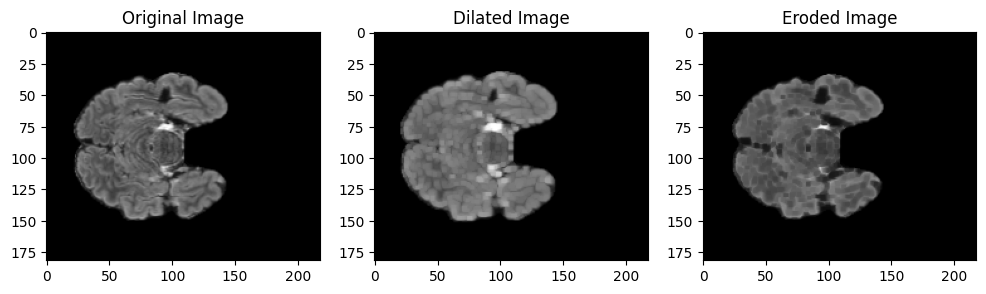

In [51]:
# Apply morphological operations (example: dilation and erosion)
kernel_size = 3
iterations = 1

# Dilation (expanding bright regions)
dilated_image = cv2.dilate(t1_image, np.ones((kernel_size, kernel_size), np.uint8), iterations=iterations)

# Erosion (shrinking bright regions)
eroded_image = cv2.erode(t1_image, np.ones((kernel_size, kernel_size), np.uint8), iterations=iterations)

# You can apply other morphological operations like opening and closing as needed

# Display the original and processed images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(t1_image, cmap='gray')

plt.subplot(132)
plt.title('Dilated Image')
plt.imshow(dilated_image, cmap='gray')

plt.subplot(133)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')

plt.show()

In [29]:
!pip install --upgrade scipy scikit-image

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 24.6 MB/s eta 0:00:0000:0100:01


In [30]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [31]:
!pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeable


In [32]:
!pip install scipy==1.12.0

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [52]:
def check_nifti(file_path):
    try:
        img = nib.load(file_path)
        # Additional checks if needed
        return True
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        return False

data_folder = 'path_to_extracted_data'
damaged_files = []

for root, dirs, files in os.walk(data_folder):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('.nii') or file_path.endswith('.nii.gz'):
            if not check_nifti(file_path):
                damaged_files.append(file_path)

if damaged_files:
    print("Damaged files:")
    for damaged_file in damaged_files:
        print(damaged_file)
else:
    print("No damaged files found.")

No damaged files found.


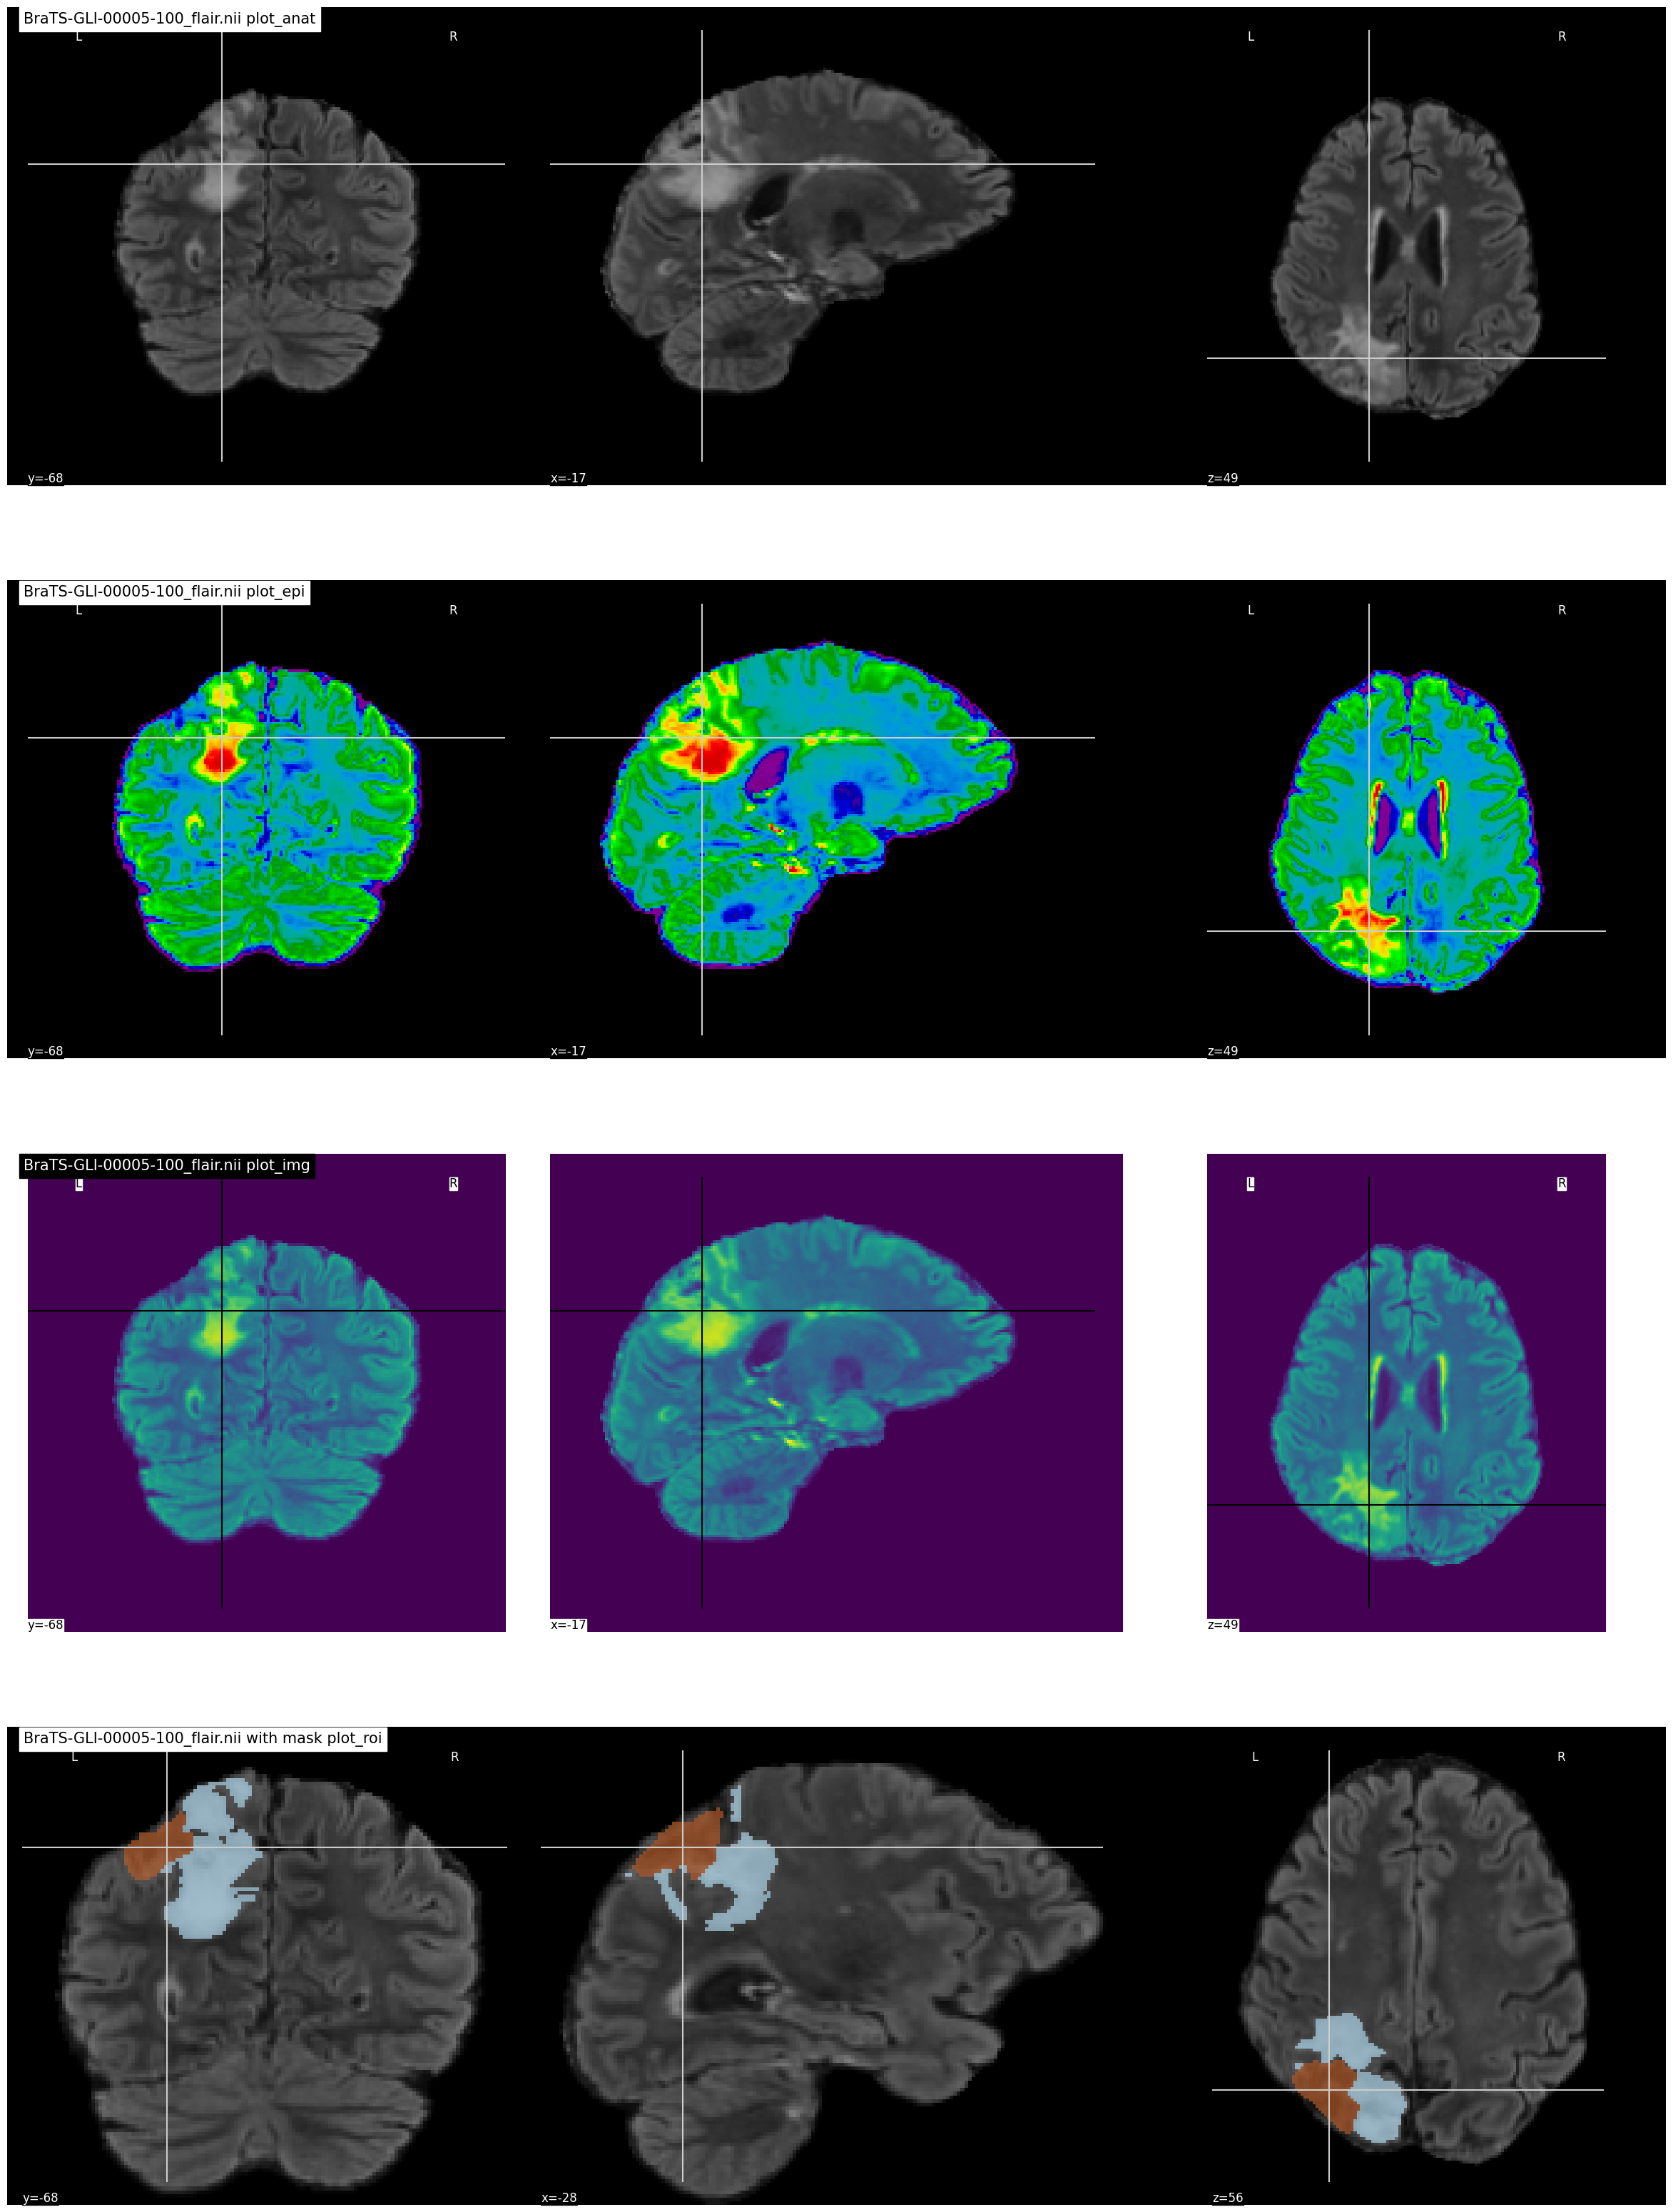

In [55]:
niimg = nl.image.load_img(pth + 'BraTS-GLI-00005-100/BraTS-GLI-00005-100-t2f.nii.gz')
nimask = nl.image.load_img(pth + 'BraTS-GLI-00005-100/BraTS-GLI-00005-100-seg.nii.gz')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))

nlplt.plot_anat(niimg,
                title='BraTS-GLI-00005-100_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS-GLI-00005-100_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS-GLI-00005-100_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask, 
               title='BraTS-GLI-00005-100_flair.nii with mask plot_roi',
               bg_img=niimg, 
               axes=axes[3], cmap='Paired')

plt.show()

In [5]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
   #     K.print_tensor(loss, message='loss value for class {} : '.format(SEGMENT_CLASSES[i]))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
            
    total_loss = total_loss / class_num
#    K.print_tensor(total_loss, message=' total dice coef: ')
    return total_loss

def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)



# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    
# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [57]:
def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    
    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    
    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    conv10 = Conv2D(4, (1,1), activation = 'softmax')(conv)
    
    return Model(inputs = inputs, outputs = conv10)

input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

model = build_unet(input_layer, 'he_normal', 0.2)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema ,dice_coef_enhancing] )

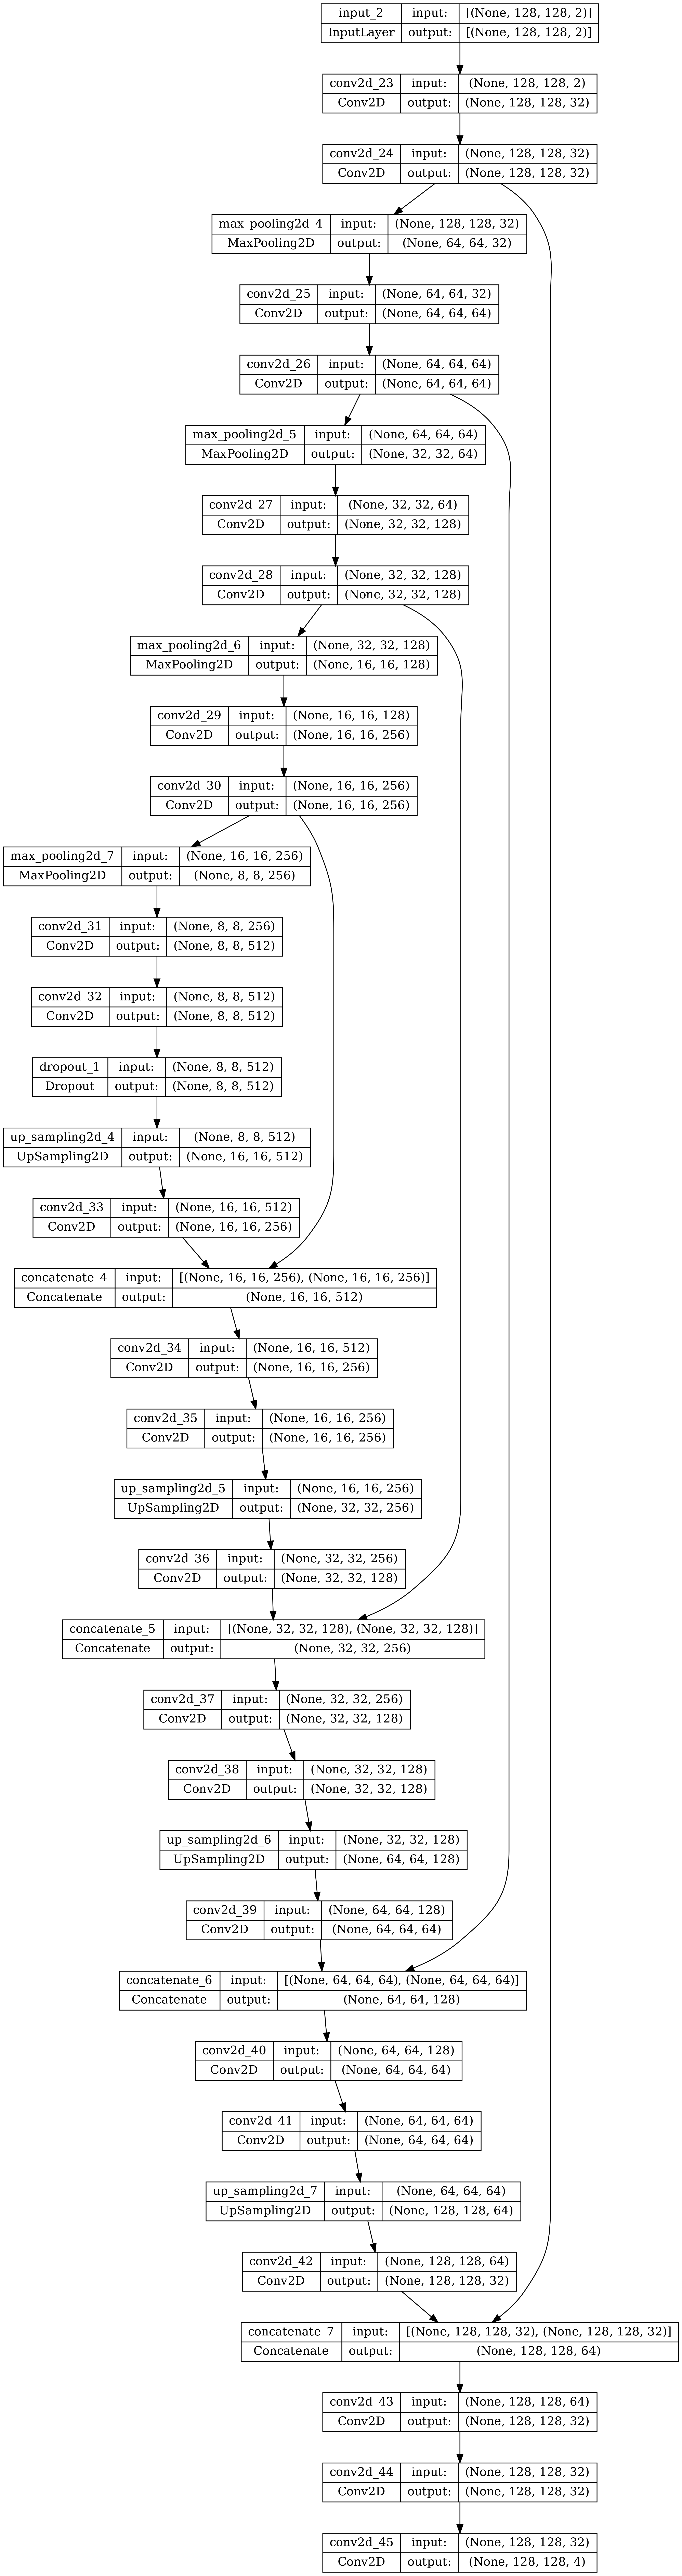

In [59]:
plot_model(model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 300)

In [62]:
train_and_val_directories = [f.path for f in os.scandir(pth) if f.is_dir()]


def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories); 

    
train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2) 
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15) 

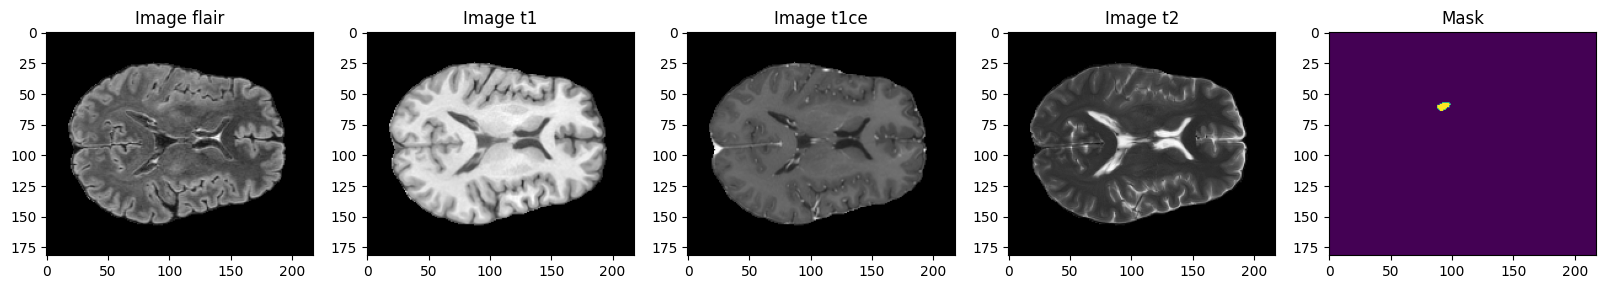

In [63]:
case_index = 1
case_name = test_ids[case_index]

test_image_flair = nib.load(os.path.join(pth, case_name, f'{case_name}-t2f.nii.gz')).get_fdata()
test_image_t1 = nib.load(os.path.join(pth, case_name, f'{case_name}-t1n.nii.gz')).get_fdata()
test_image_t1ce = nib.load(os.path.join(pth, case_name, f'{case_name}-t1c.nii.gz')).get_fdata()
test_image_t2 = nib.load(os.path.join(pth, case_name, f'{case_name}-t2w.nii.gz')).get_fdata()
test_mask = nib.load(os.path.join(pth, case_name, f'{case_name}-seg.nii.gz')).get_fdata()

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
slice_w = test_image_flair.shape[2] // 2

axes[0].imshow(test_image_flair[:, :, slice_w], cmap='gray')
axes[0].set_title('Image flair')

axes[1].imshow(test_image_t1[:, :, slice_w], cmap='gray')
axes[1].set_title('Image t1')

axes[2].imshow(test_image_t1ce[:, :, slice_w], cmap='gray')
axes[2].set_title('Image t1ce')

axes[3].imshow(test_image_t2[:, :, slice_w], cmap='gray')
axes[3].set_title('Image t2')

axes[4].imshow(test_mask[:, :, slice_w])
axes[4].set_title('Mask')

plt.show()

In [76]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        print(*self.dim)
        y = np.zeros((self.batch_size*VOLUME_SLICES, 182,218))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))

        
        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(pth, i)

            data_path = os.path.join(case_path, f'{i}-t2f.nii.gz');
            flair = nib.load(data_path).get_fdata()    

            data_path = os.path.join(case_path, f'{i}-t1c.nii.gz');
            ce = nib.load(data_path).get_fdata()
            
            data_path = os.path.join(case_path, f'{i}-seg.nii.gz');
            seg = nib.load(data_path).get_fdata()
        
            for j in range(VOLUME_SLICES):
                X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
                X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

                y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
                    
        # Generate masks
        y[y==4] = 3;
        mask = tf.one_hot(y, 4);
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        return X/np.max(X), Y
        
training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)

In [77]:
print(len(train_ids))
print(len(val_ids))
print(len(test_ids))

918
270
162


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


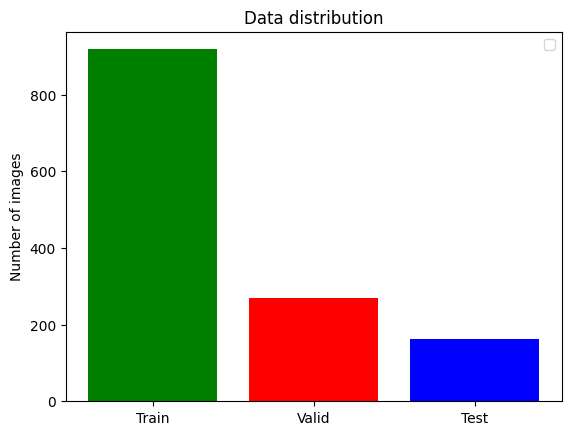

In [78]:
def showDataLayout():
    plt.bar(["Train","Valid","Test"],
    [len(train_ids), len(val_ids), len(test_ids)], align='center',color=[ 'green','red', 'blue'])
    plt.legend()

    plt.ylabel('Number of images')
    plt.title('Data distribution')
    plt.savefig('data2024.png')
    plt.show()
    
showDataLayout()

In [79]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="3D-UNet-2024-weights-improvement-{epoch:02d}-{val_accuracy:.3f}.hdf5" 

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,  mode='max')

#It helps prevent overfitting. The patience parameter is set to 3, meaning training will stop after 3 epochs without improvement.
early_stop = EarlyStopping(monitor='val_loss', patience=300, verbose=1, restore_best_weights=True)

csv_logger = CSVLogger('training_2024_2D_UNet.log')

model.fit(training_generator,
                    epochs=5,
                    steps_per_epoch=len(train_ids),
                    callbacks= [checkpoint, csv_logger, early_stop],
                    validation_data = valid_generator
                    )  


128 128
Epoch 1/5


2024-09-30 06:43:48.924656: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


128 128
128 128


2024-09-30 06:43:51.753693: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-09-30 06:43:52.148246: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-30 06:43:52.583184: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


128 128


2024-09-30 06:44:05.977734: I external/local_xla/xla/service/service.cc:168] XLA service 0x76f0416e8880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-30 06:44:05.977787: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-09-30 06:44:05.977802: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-09-30 06:44:05.977820: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2024-09-30 06:44:05.999568: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727678646.201726 3906143 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


918/918 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9831 - mean_io_u_1: 0.6021 - dice_coef: 0.2640 - precision: 0.9830 - sensitivity: 0.9819 - specificity: 0.9947 - dice_coef_necrotic: 0.0023 - dice_coef_edema: 0.1133 - dice_coef_enhancing: 0.0421128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 1

/home/amit/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


918/918 [==============================] - 1067s 1s/step - loss: 0.0792 - accuracy: 0.9831 - mean_io_u_1: 0.6021 - dice_coef: 0.2640 - precision: 0.9830 - sensitivity: 0.9819 - specificity: 0.9947 - dice_coef_necrotic: 0.0023 - dice_coef_edema: 0.1133 - dice_coef_enhancing: 0.0421 - val_loss: 0.0679 - val_accuracy: 0.9841 - val_mean_io_u_1: 0.3756 - val_dice_coef: 0.2653 - val_precision: 0.9840 - val_sensitivity: 0.9840 - val_specificity: 0.9947 - val_dice_coef_necrotic: 0.0019 - val_dice_coef_edema: 0.1180 - val_dice_coef_enhancing: 0.0396
Epoch 2/5
128 128
128 128
918/918 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9842 - mean_io_u_1: 0.4566 - dice_coef: 0.2733 - precision: 0.9843 - sensitivity: 0.9839 - specificity: 0.9948 - dice_coef_necrotic: 0.0039 - dice_coef_edema: 0.1532 - dice_coef_enhancing: 0.0659128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128
128 128


In [80]:
model.save("model_2024_2D_UNet.h5")

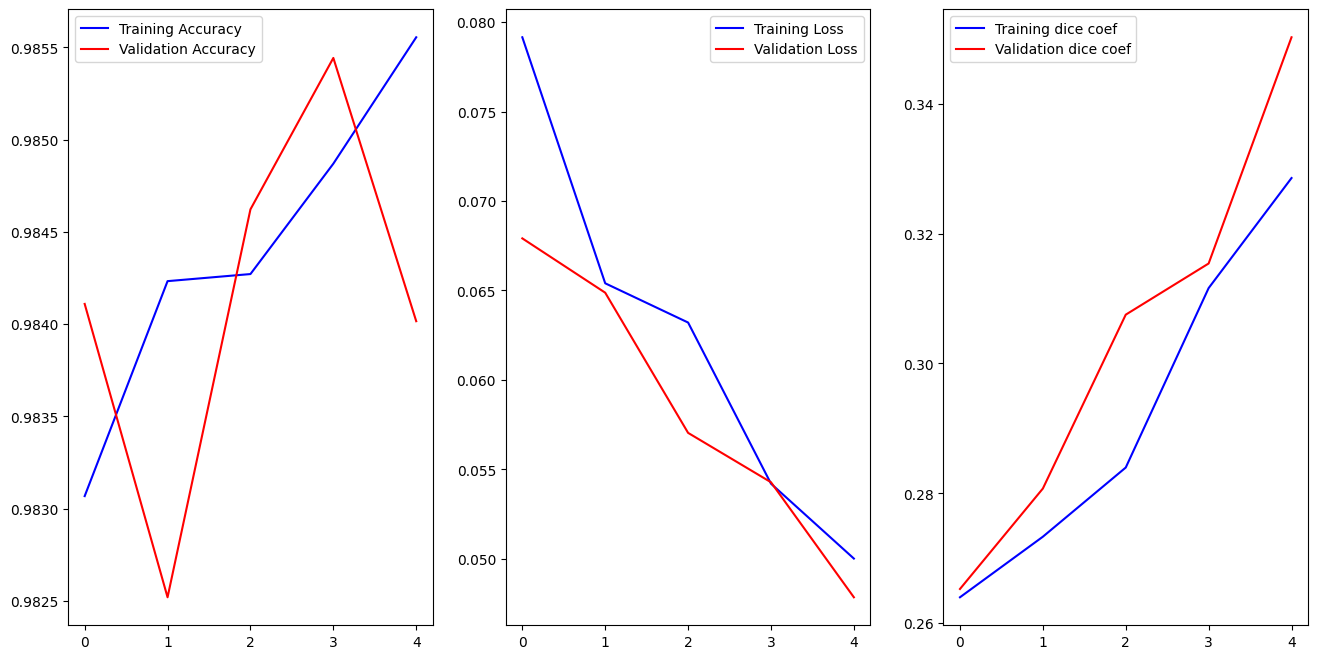

In [14]:
model = tf.keras.models.load_model('/home/amit/DSML_Brats/model_2024_2D_UNet.h5', 
                                   custom_objects={ 'accuracy' : tf.keras.metrics.MeanIoU(num_classes=4),
                                                   "dice_coef": dice_coef,
                                                   "precision": precision,
                                                   "sensitivity":sensitivity,
                                                   "specificity":specificity,
                                                   "dice_coef_necrotic": dice_coef_necrotic,
                                                   "dice_coef_edema": dice_coef_edema,
                                                   "dice_coef_enhancing": dice_coef_enhancing
                                                  }, compile=False)

history = pd.read_csv('/home/amit/DSML_Brats/training_2024_2D_UNet.log', sep=',', engine='python')


acc = history['accuracy']
val_acc = history['val_accuracy']

epoch = range(len(acc))

loss = history['loss']
val_loss = history['val_loss']

train_dice = history['dice_coef']
val_dice = history['val_dice_coef']

f, ax = plt.subplots(1, 3, figsize=(16, 8))

ax[0].plot(epoch, acc, 'b', label='Training Accuracy')
ax[0].plot(epoch, val_acc, 'r', label='Validation Accuracy')
ax[0].legend()

ax[1].plot(epoch, loss, 'b', label='Training Loss')
ax[1].plot(epoch, val_loss, 'r', label='Validation Loss')
ax[1].legend()

ax[2].plot(epoch, train_dice, 'b', label='Training dice coef')
ax[2].plot(epoch, val_dice, 'r', label='Validation dice coef')
ax[2].legend()

plt.savefig('training_result_2024.png')
plt.show()